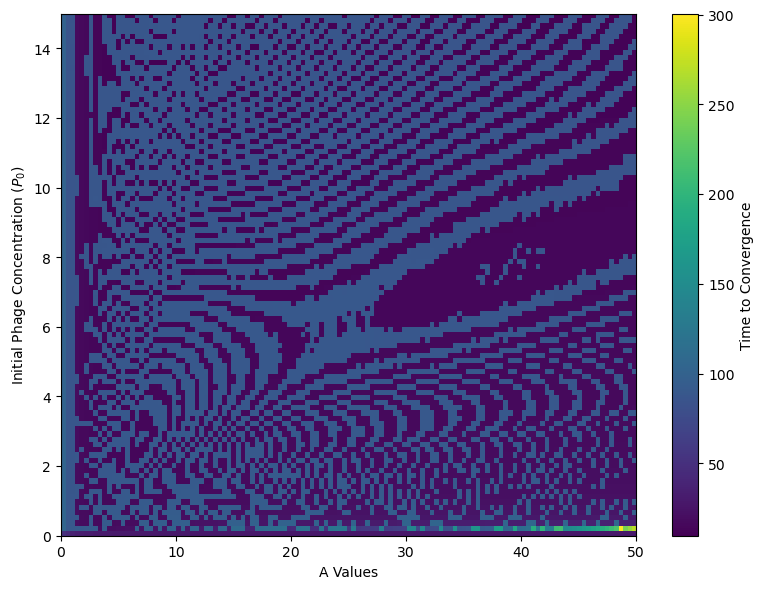

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
rho1 = 0.0
rho2 = 0.0
rho3 = 0.0
rho4 = 0.7
alpha1 = 0.0
alpha2 = 0.4
alpha3 = 0.0
delta2 = 0.6
phi1 = 1e-1
phi2 = 0
phi3 = 1e-1
gamma = 0.3
eta = 0.1
CC = 0.887
burstsize = 180

params = (rho1, rho2, rho3, rho4, CC, alpha1, alpha2, alpha3, phi1, phi2, phi3, gamma, delta2, eta,burstsize)

def system(t, y, A):
    B1, B2, B3, B4, P = y
    BA = B1 + B2 + B3 + B4
    dB1 = rho1 * B1 * (1 - BA / CC) - alpha1 * A * B1 - phi1 * P * B1
    dB2 = rho2 * B2 * (1 - BA / CC) + alpha1 * A * B1 + alpha2*A*B3 -(phi2+phi3)*P * B2 - delta2 * (A / (1 + A)) *B2
    dB3 = rho3 * B3 * (1 - BA / CC)  + phi1 * P * B1 - (alpha2+alpha3) * A * B3+phi2*P*B2 - gamma*(P/(1+P))*B3
    dB4 = rho4 * B4 * (1 - BA / CC) + alpha3 * A * B3 + phi3 * P * B2 - eta * ((P + A) / (1 + P + A)) * B4
    dP  = burstsize * (gamma * (P / (1 + P)) * B3 + eta * (P / (1 + P)) * B4) - (phi1*B1 + (phi2+phi3)*B3)*P
    return np.array([dB1, dB2, dB3, dB4, dP])


A_values = np.linspace(0, 50, num=125)
phage_ic_values = np.linspace(0, 15, num=100)

# Time span
t_span = (0, 10000)
t_eval = np.linspace(t_span[0], t_span[1], 100000)

def convergence_event(t, y, A_value, tolerance=1e-6):
    dydt = system(t, y, A_value)
    return np.linalg.norm(dydt[:4]) - tolerance

# Set event properties
convergence_event.terminal = True  # Stop integration when event is triggered
convergence_event.direction = -1   # Trigger only when value is decreasing through zero




results = []

for A_val in A_values:
    for P0 in phage_ic_values:
        y0 = [1, 0.001, 0.001, 0.001, P0]

        # Correctly capture the current A_val in the lambda
        event = lambda t, y, A_val=A_val: convergence_event(t, y, A_val)
        event.terminal = True
        event.direction = -1

        sol = solve_ivp(
            lambda t, y: system(t, y, A_val),
            t_span, y0, t_eval=t_eval,
            method='RK45', rtol=1e-9, atol=1e-9,
            events=event, dense_output=True
        )

        if len(sol.t_events[0]) > 0:
            converged_time = sol.t_events[0][0]
            last_state = sol.sol(converged_time)
        else:
            converged_time = np.nan
            last_state = sol.y[:, -1]

        results.append({
            'A': A_val,
            'P0': P0,
            'Time_to_converge': converged_time,
            'B1': last_state[0],
            'B2': last_state[1],
            'B3': last_state[2],
            'B4': last_state[3],
            'P': last_state[4]
        })


# Extract unique values for A and P0
A_vals = sorted(set(result['A'] for result in results))
P0_vals = sorted(set(result['P0'] for result in results))

# Create a 2D array to hold convergence times
heatmap_data = np.full((len(P0_vals), len(A_vals)), np.nan)

# Fill the heatmap_data array
for result in results:
    i = P0_vals.index(result['P0'])
    j = A_vals.index(result['A'])
    heatmap_data[i, j] = result['Time_to_converge']

# Plot heatmap
plt.figure(figsize=(8, 6))
im = plt.imshow(heatmap_data, aspect='auto', origin='lower', 
                extent=[min(A_vals), max(A_vals), min(P0_vals), max(P0_vals)],
                cmap='viridis')

plt.colorbar(im, label='Time to Convergence')
plt.xlabel('A Values')
plt.ylabel(r'Initial Phage Concentration $(P_0)$')
#plt.title('Convergence Time Heatmap')
plt.tight_layout()
plt.savefig('possible_chaos_4.pdf')
plt.show()


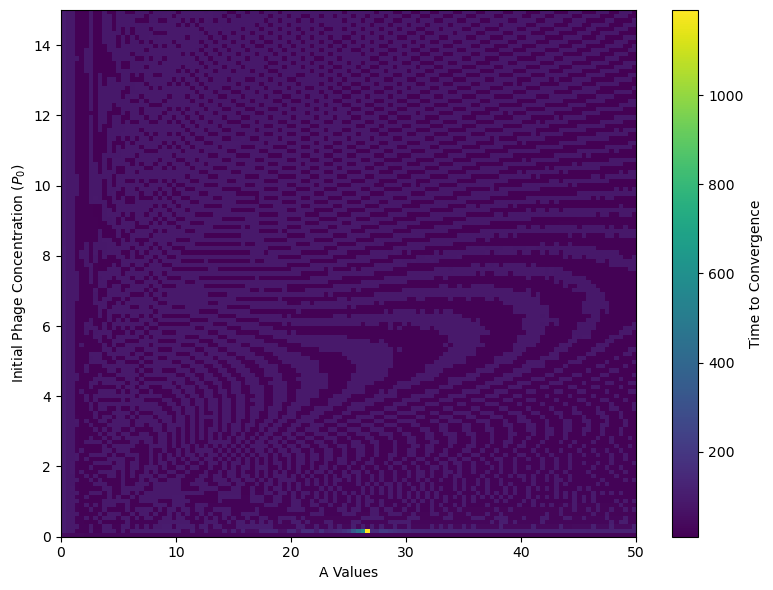

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
rho1 = 0.0
rho2 = 0.0
rho3 = 0.0
rho4 = 0.7
alpha1 = 0.0
alpha2 = 0.4
alpha3 = 0.0
delta2 = 0.6
phi1 = 1e-1
phi2 = 0
phi3 = 1e-1
gamma = 0.3
eta = 0.1
CC = 0.887
burstsize = 180

params = (rho1, rho2, rho3, rho4, CC, alpha1, alpha2, alpha3, phi1, phi2, phi3, gamma, delta2, eta,burstsize)

def system(t, y, A):
    B1, B2, B3, B4, P = y
    BA = B1 + B2 + B3 + B4
    dB1 = rho1 * B1 * (1 - BA / CC) - alpha1 * A * B1 - phi1 * P * B1
    dB2 = rho2 * B2 * (1 - BA / CC) + alpha1 * A * B1 + alpha2*A*B3 -(phi2+phi3)*P * B2 - delta2 * (A / (1 + A)) *B2
    dB3 = rho3 * B3 * (1 - BA / CC)  + phi1 * P * B1 - (alpha2+alpha3) * A * B3+phi2*P*B2 - gamma*(P/(1+P))*B3
    dB4 = rho4 * B4 * (1 - BA / CC) + alpha3 * A * B3 + phi3 * P * B2 - eta * ((P + A) / (1 + P + A)) * B4
    dP  = burstsize * (gamma * (P / (1 + P)) * B3 + eta * (P / (1 + P)) * B4) - (phi1*B1 + (phi2+phi3)*B3)*P
    return np.array([dB1, dB2, dB3, dB4, dP])


A_values = np.linspace(0, 50, num=125)
phage_ic_values = np.linspace(0, 15, num=125)

# Time span
t_span = (0, 10000)
t_eval = np.linspace(t_span[0], t_span[1], 100000)

def convergence_event(t, y, A_value, tolerance=1e-6):
    dydt = system(t, y, A_value)
    return np.linalg.norm(dydt[:4]) - tolerance

# Set event properties
convergence_event.terminal = True  # Stop integration when event is triggered
convergence_event.direction = -1   # Trigger only when value is decreasing through zero




results = []

for A_val in A_values:
    for P0 in phage_ic_values:
        y0 = [1, 0.001, 0.001, 0.001, P0]

        # Correctly capture the current A_val in the lambda
        event = lambda t, y, A_val=A_val: convergence_event(t, y, A_val)
        event.terminal = True
        event.direction = -1

        sol = solve_ivp(
            lambda t, y: system(t, y, A_val),
            t_span, y0, t_eval=t_eval,
            method='RK45', rtol=1e-9, atol=1e-9,
            events=event, dense_output=True
        )

        if len(sol.t_events[0]) > 0:
            converged_time = sol.t_events[0][0]
            last_state = sol.sol(converged_time)
        else:
            converged_time = np.nan
            last_state = sol.y[:, -1]

        results.append({
            'A': A_val,
            'P0': P0,
            'Time_to_converge': converged_time,
            'B1': last_state[0],
            'B2': last_state[1],
            'B3': last_state[2],
            'B4': last_state[3],
            'P': last_state[4]
        })


# Extract unique values for A and P0
A_vals = sorted(set(result['A'] for result in results))
P0_vals = sorted(set(result['P0'] for result in results))

# Create a 2D array to hold convergence times
heatmap_data = np.full((len(P0_vals), len(A_vals)), np.nan)

# Fill the heatmap_data array
for result in results:
    i = P0_vals.index(result['P0'])
    j = A_vals.index(result['A'])
    heatmap_data[i, j] = result['Time_to_converge']

# Plot heatmap
plt.figure(figsize=(8, 6))
im = plt.imshow(heatmap_data, aspect='auto', origin='lower', 
                extent=[min(A_vals), max(A_vals), min(P0_vals), max(P0_vals)],
                cmap='viridis')

plt.colorbar(im, label='Time to Convergence')
plt.xlabel('A Values')
plt.ylabel(r'Initial Phage Concentration $(P_0)$')
#plt.title('Convergence Time Heatmap')
plt.tight_layout()
plt.savefig('possible_chaos_6.pdf')
plt.show()


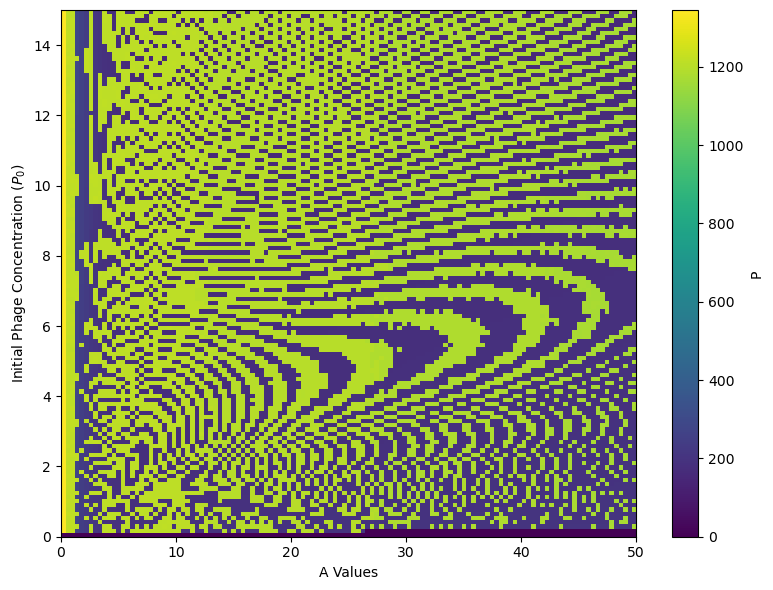

In [5]:
import numpy as np

# Create 2D arrays for each variable
B1_data = np.full((len(P0_vals), len(A_vals)), np.nan)
B2_data = np.full((len(P0_vals), len(A_vals)), np.nan)
B3_data = np.full((len(P0_vals), len(A_vals)), np.nan)
B4_data = np.full((len(P0_vals), len(A_vals)), np.nan)
P_data  = np.full((len(P0_vals), len(A_vals)), np.nan)

# Fill data arrays
for result in results:
    i = P0_vals.index(result['P0'])
    j = A_vals.index(result['A'])
    B1_data[i, j] = result['B1']
    B2_data[i, j] = result['B2']
    B3_data[i, j] = result['B3']
    B4_data[i, j] = result['B4']
    P_data[i, j]  = result['P']

# Plotting function
def plot_heatmap(data, title, label):
    plt.figure(figsize=(8, 6))
    im = plt.imshow(data, aspect='auto', origin='lower',
                    extent=[min(A_vals), max(A_vals), min(P0_vals), max(P0_vals)],
                    cmap='viridis')
    plt.colorbar(im, label=label)
    plt.xlabel('A Values')
    plt.ylabel(r'Initial Phage Concentration $(P_0)$')
    #plt.title(title)
    plt.tight_layout()
    plt.savefig('phage_chaos.pdf')
    plt.show()

# Generate the 5 heatmaps
#plot_heatmap(B1_data, 'Final B1 Population', 'B1')
#plot_heatmap(B2_data, 'Final B2 Population', 'B2')
#plot_heatmap(B3_data, 'Final B3 Population', 'B3')
#plot_heatmap(B4_data, 'Final B4 Population', 'B4')
plot_heatmap(P_data,  'Final Phage Concentration (P)', 'P')
#plt.savefig('phage_chaos.pdf')



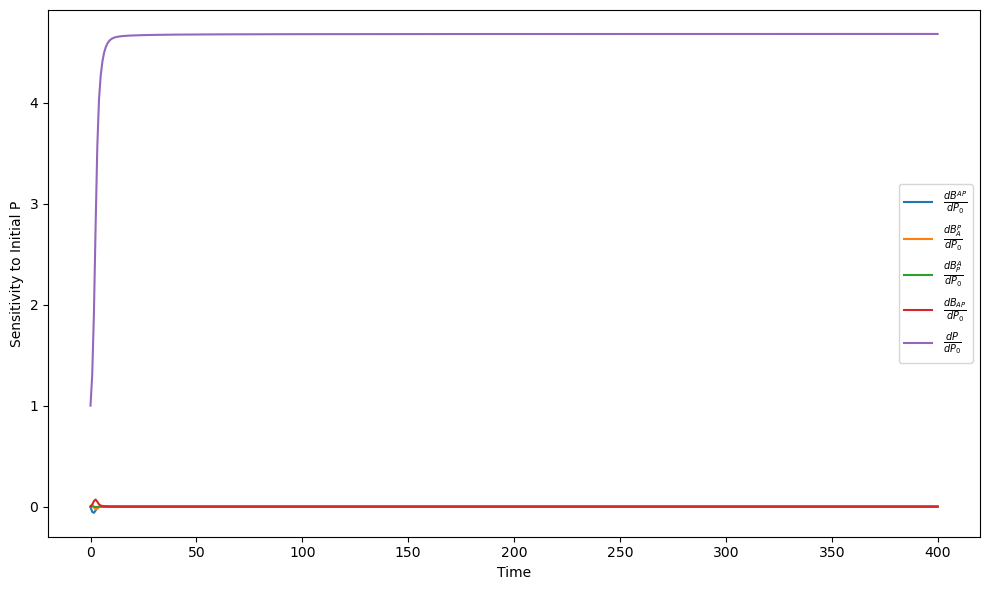

In [9]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import sympy as sp

# Parameters
rho1, rho2, rho3, rho4 = 0.0, 0.0, 0.0, 0.7
alpha1, alpha2, alpha3 = 0.0, 0.4, 0.0
delta2, phi1, phi2, phi3 = 0.6, 1e-1, 0.0, 1e-1
gamma, eta, CC, burstsize, A = 0.3, 0.1, 0.887, 180, 23

# Define the system and its variational extension
def system_with_variational(t, Y, A):
    B1, B2, B3, B4, P = Y[:5]
    S = Y[5:].reshape((5, 5))  # Sensitivity matrix d(y)/dP0
    BA = B1 + B2 + B3 + B4

    # System equations
    dB1 = rho1 * B1 * (1 - BA / CC) - alpha1 * A * B1 - phi1 * P * B1
    dB2 = rho2 * B2 * (1 - BA / CC) + alpha1 * A * B1 + alpha2 * A * B3 - (phi2 + phi3) * P * B2 - delta2 * (A / (1 + A)) * B2
    dB3 = rho3 * B3 * (1 - BA / CC) + phi1 * P * B1 - (alpha2 + alpha3) * A * B3 + phi2 * P * B2 - gamma * (P / (1 + P)) * B3
    dB4 = rho4 * B4 * (1 - BA / CC) + alpha3 * A * B3 + phi3 * P * B2 - eta * ((P + A) / (1 + P + A)) * B4
    dP  = burstsize * (gamma * (P / (1 + P)) * B3 + eta * (P / (1 + P)) * B4) - (phi1 * B1 + (phi2 + phi3) * B3) * P

    # Jacobian matrix evaluated at current state
    J = np.array([
        [-A * alpha1 - P * phi1 + (1 - BA / CC) * rho1 - (B1 * rho1) / CC, -(B1 * rho1) / CC, -(B1 * rho1) / CC, -(B1 * rho1) / CC, -B1 * phi1],
        [A * alpha1 - (B2 * rho2) / CC,
         -(A * delta2) / (1 + A) - P * (phi2 + phi3) + (1 - BA / CC) * rho2 - (B2 * rho2) / CC,
         A * alpha2 - (B2 * rho2) / CC, -(B2 * rho2) / CC, -B2 * (phi2 + phi3)],
        [P * phi1 - (B3 * rho3) / CC, P * phi2 - (B3 * rho3) / CC,
         -A * (alpha2 + alpha3) - (gamma * P) / (1 + P) + (1 - BA / CC) * rho3 - (B3 * rho3) / CC,
         -(B3 * rho3) / CC,
         (B3 * gamma * P) / (1 + P)**2 - (B3 * gamma) / (1 + P) + B1 * phi1 + B2 * phi2],
        [-(B4 * rho4) / CC, P * phi3 - (B4 * rho4) / CC, A * alpha3 - (B4 * rho4) / CC,
         -(eta * (A + P)) / (1 + A + P) + (1 - BA / CC) * rho4 - (B4 * rho4) / CC,
         (B4 * eta * (A + P)) / (1 + A + P)**2 - (B4 * eta) / (1 + A + P) + B2 * phi3],
        [-P * phi1, 0,
         (burstsize * gamma * P) / (1 + P) - P * (phi2 + phi3),
         (burstsize * eta * P) / (1 + P),
         burstsize * (
             - (B4 * eta * P) / (1 + P)**2
             - (B3 * gamma * P) / (1 + P)**2
             + (B4 * eta) / (1 + P)
             + (B3 * gamma) / (1 + P)
         ) - B1 * phi1 - B3 * (phi2 + phi3)]
    ])

    # Variational equation: dS/dt = J * S
    dSdt = J @ S

    return np.concatenate(([dB1, dB2, dB3, dB4, dP], dSdt.flatten()))

# Initial state and sensitivity: y0 and dy/dP0
# Initial state and full variational sensitivity: Identity matrix
y0_base = [1, 0.001, 0.001, 0.001, 6]
S0 = np.eye(5)
y0 = np.concatenate((y0_base, S0.flatten()))


# Time grid
t_span = [0, 400]
t_eval = np.linspace(t_span[0], t_span[1], 500)

# Solve the system
sol = solve_ivp(system_with_variational, t_span, y0, args=(A,), t_eval=t_eval, rtol=1e-9, atol=1e-9)

# Extract sensitivity values
sensitivity = sol.y[5:, :]  # shape (25, len(t)) -> sensitivities for all 5 states w.r.t all 5 initial vars
dydP0 = sensitivity[4::5]  # rows corresponding to d[Bi]/dP0 and dP/dP0

# Plotting
plt.figure(figsize=(10, 6))
labels = [
    r'$\frac{dB^{AP}}{dP_0}$',
    r'$\frac{dB^{P}_{A}}{dP_0}$',
    r'$\frac{dB^{A}_{P}}{dP_0}$',
    r'$\frac{dB_{AP}}{dP_0}$',
    r'$\frac{dP}{dP_0}$'
]

for i in range(5):
    plt.plot(sol.t, dydP0[i], label=labels[i])

plt.xlabel('Time')
plt.ylabel('Sensitivity to Initial P')
#plt.title('Variational Sensitivity of System Variables w.r.t Initial P')
plt.legend()
#plt.grid(True)
plt.tight_layout()
plt.savefig('variational_eq_phages_chaos.pdf')
plt.show()
